In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
#from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
#from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2

In [ ]:
data=pd.read_csv('/content/Hepatitis_dataset_22.csv')
data

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ColuASCITESmn13,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


Summarization of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ColuASCITESmn13  155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

Checking Missing Values

In [ ]:
# Replace missing values ('?') with NaN
data = data.replace('?', pd.NA)

In [ ]:
# Check for missing values
data.isnull().sum().sum()

167

In [ ]:
data=data.dropna()

In [ ]:
# Check for missing values
data.isnull().sum().sum()

0

In [ ]:
#check for duplicates
data.duplicated().any()

False

Preprocessing

In [ ]:
# Preprocess the data
# Assuming the target variable is in the 'Classification' column
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2
# Chi² 2-sample Test
f_score = chi2(X, y)
chisquare = pd.DataFrame(f_score).T.set_index(X.columns).rename(columns={0:'ChiSqr_Score', 1:"ChiSqr_pValue"})
chi2_list = chisquare.sort_values(by='ChiSqr_Score', ascending=False)
chi2_list

,ChiSqr_Score,ChiSqr_pValue
ColuASCITESmn13_1,15.615767,0.000078
PROTIME_31,15.461538,0.000084
AGE,11.190998,0.000822
SGOT_157,10.307692,0.001325
VARICES_1,8.369690,0.003815
...,...,...
ALK PHOSPHATE_85,0.174640,0.676021
LIVER FIRM_1,0.131609,0.716769
LIVER FIRM_2,0.119075,0.730040
ANTIVIRALS,0.105469,0.745363


In [ ]:
# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio for each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the top 5 components
top_5_components = pca.components_[:5]
print("Top 5 components:")
print(top_5_components)


Explained variance ratio: [0.93464627 0.00848859 0.00491469 0.0046511  0.00366002]
Top 5 components:
[[ 9.99393109e-01 -1.41943073e-03 -1.68487967e-03 ... -2.64213336e-04
  -4.67829804e-04 -2.88563243e-03]
 [-1.62632603e-02  2.07038371e-02  7.60466559e-02 ...  1.38801594e-02
  -4.96697868e-02 -1.17600774e-02]
 [-2.37347688e-04  4.27041412e-02 -1.58262464e-01 ...  2.85496196e-02
   1.43213832e-02 -9.22385220e-03]
 [-1.28428171e-02  3.57697356e-02  1.28447915e-01 ... -1.31302077e-02
   1.84828670e-02  3.72981265e-03]
 [ 4.84427216e-03  9.96772162e-02 -2.19677003e-01 ...  7.99507892e-03
  -4.01184671e-02 -3.30925820e-03]]


Splitting the dataset into the Training set and Test se

Feature scaling

In [ ]:
# Set up X and y variables
y, X = data['LIVER BIG'],data.drop(columns='LIVER BIG')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the Test set results

In [ ]:
# Make predictions on the testing data
y_pred_dt = classifier.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Print the accuracy
print("Accuracy:", accuracy_dt)

Accuracy: 0.9583333333333334


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_dt)
print('Classification Report for the classifier :\n', report)

Classification Report for the classifier :
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.95      0.98        21

    accuracy                           0.96        24
   macro avg       0.88      0.98      0.92        24
weighted avg       0.97      0.96      0.96        24



Confusion Matrix:
[[ 3  0]
 [ 1 20]]
Precision: 1.0
Recall: 0.9523809523809523
F1-score: 0.975609756097561
AUC: 0.9761904761904762


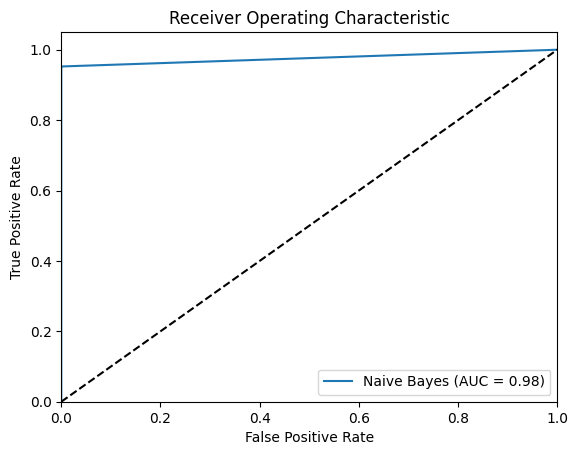

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
# Map target labels to binary values of 0 and 1
y_test_binary = np.where(y_test == '2', 1, 0)
y_pred_dt_binary = np.where(y_pred_dt == '2', 1, 0)

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test_binary, y_pred_dt_binary)

# Calculate precision, recall, and F1-score
precision_dt = precision_score(y_test_binary, y_pred_dt_binary, pos_label=1)
recall_dt= recall_score(y_test_binary, y_pred_dt_binary, pos_label=1)
f1_dt = f1_score(y_test_binary, y_pred_dt_binary, pos_label=1)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y_test_binary, y_pred_dt_binary)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("AUC:", roc_auc_dt)

# Plot the ROC curve
plt.plot(fpr_dt, tpr_dt, label='Naive Bayes (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=1)
# Fit the classifier to the training data
classifier_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_rf)
print('Classification Report for the classifier :\n', report)

Classification Report for the classifier :
               precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.91      1.00      0.95        21

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24



In [ ]:
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Print the accuracy
print("Accuracy:", accuracy_rf)

Accuracy: 0.9166666666666666


Confusion Matrix:
[[ 1  2]
 [ 0 21]]
Precision: 0.9130434782608695
Recall: 1.0
F1-score: 0.9545454545454545
AUC: 0.9230769230769231


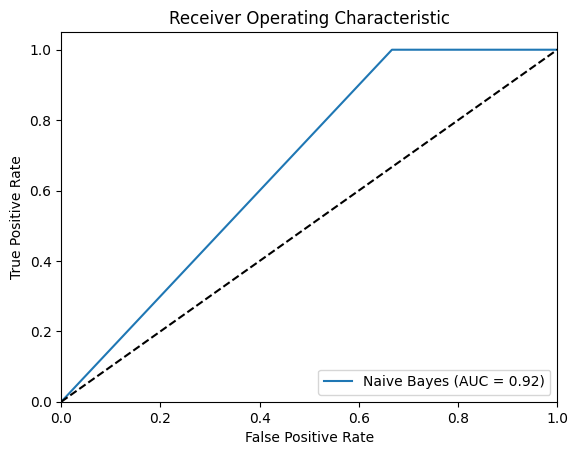

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
# Map target labels to binary values of 0 and 1
y_test_binary = np.where(y_test == '2', 1, 0)
y_pred_rf_binary = np.where(y_pred_rf == '2', 1, 0)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_binary, y_pred_rf_binary)

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test_binary, y_pred_rf_binary, pos_label=1)
recall_rf = recall_score(y_test_binary, y_pred_rf_binary, pos_label=1)
f1_rf = f1_score(y_test_binary, y_pred_rf_binary, pos_label=1)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_binary, y_pred_rf_binary)
roc_auc_rf = auc(fpr_nb, tpr_nb)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("AUC:", roc_auc_rf)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label='Naive Bayes (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Perform predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Print the accuracy
print("Accuracy:", accuracy_nb)

Accuracy: 0.875


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_nb)
print('Classification Report for the classifier :\n', report)

Classification Report for the classifier :
               precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       1.00      0.85      0.92        13

    accuracy                           0.88        16
   macro avg       0.80      0.92      0.83        16
weighted avg       0.93      0.88      0.89        16



Confusion Matrix:
[[ 3  0]
 [ 2 11]]
Precision: 1.0
Recall: 0.8461538461538461
F1-score: 0.9166666666666666
AUC: 0.9230769230769231


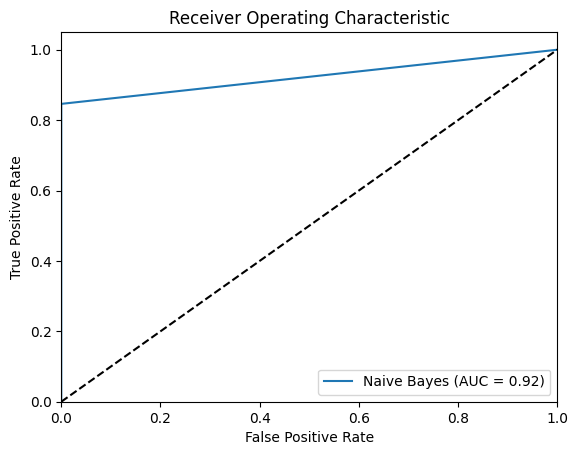

In [ ]:
# Map target labels to binary values of 0 and 1
y_test_binary = np.where(y_test == '2', 1, 0)
y_pred_nb_binary = np.where(y_pred_nb == '2', 1, 0)
# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test_binary, y_pred_nb_binary)
# Calculate precision, recall, and F1-score
precision_nb = precision_score(y_test_binary, y_pred_nb_binary, pos_label=1)
recall_nb = recall_score(y_test_binary, y_pred_nb_binary, pos_label=1)
f1_nb = f1_score(y_test_binary, y_pred_nb_binary, pos_label=1)
# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_nb, tpr_nb, thresholds = roc_curve(y_test_binary, y_pred_nb_binary)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(cm_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
print("AUC:", roc_auc_nb)

# Plot the ROC curve
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



In [ ]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Naive Bayes',
              'Decision Tree'],
    'Accuracy' : [accuracy_rf*100,accuracy_nb*100, accuracy_dt*100],
    'Precision' :[precision_rf*100, precision_nb*100, precision_dt*100],
    'Recall' : [recall_rf*100,recall_nb*100 ,recall_dt*100],
    'F1-Score': [f1_rf*100,f1_nb*100,f1_dt*100]
})
Models

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest Classifier,91.666667,91.304348,100.000000,95.454545
1,Naive Bayes,87.500000,100.000000,84.615385,91.666667
2,Decision Tree,95.833333,100.000000,95.238095,97.560976


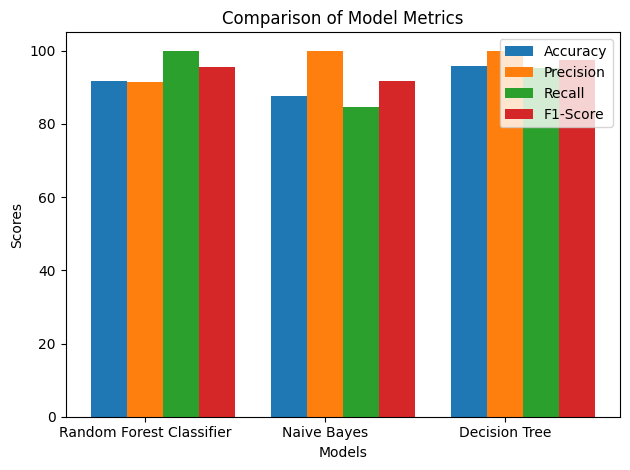

In [ ]:
models = Models['Model']
accuracy = [accuracy_rf*100, accuracy_nb*100, accuracy_dt*100]
precision = [precision_rf*100,precision_nb*100,precision_dt*100]
recall = [recall_rf*100,recall_nb*100,recall_dt*100]
f1_score = [f1_rf*100,f1_nb*100,f1_dt*100]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + (2 * width), f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()